In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("NYC Taxi Analysis") \
    .getOrCreate()

In [ ]:
df = spark.read.parquet("yellow_tripdata_2023-01.parquet")
df.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [ ]:
df.show(5)
df.select("trip_distance", "total_amount", "passenger_count").summary().show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2023-01-01 00:32:10|  2023-01-01 00:40:36|            1.0|         0.97|       1.0|                 N|         161|         141|           2|        9.3|  1.0|    0.5|       0.

In [ ]:
df.groupBy("passenger_count").count().orderBy("count", ascending=False).show()


+---------------+-------+
|passenger_count|  count|
+---------------+-------+
|            1.0|2261400|
|            2.0| 451536|
|            3.0| 106353|
|           NULL|  71743|
|            4.0|  53745|
|            0.0|  51164|
|            5.0|  42681|
|            6.0|  28124|
|            8.0|     13|
|            7.0|      6|
|            9.0|      1|
+---------------+-------+



In [ ]:
df.groupBy("passenger_count").avg("total_amount").orderBy("avg(total_amount)", ascending=False).show()

+---------------+------------------+
|passenger_count| avg(total_amount)|
+---------------+------------------+
|            8.0| 99.33692307692307|
|            9.0|             92.25|
|            7.0| 85.11166666666666|
|            4.0|29.611602381617445|
|            2.0|29.313282019602468|
|           NULL|  29.1335898972719|
|            3.0|28.475419687266424|
|            5.0| 26.58826128722399|
|            6.0|26.558483857203942|
|            1.0|26.443471973092926|
|            0.0|24.162123563442954|
+---------------+------------------+



In [ ]:
df.filter(df.payment_type == 1).select("tip_amount").summary().show()

+-------+------------------+
|summary|        tip_amount|
+-------+------------------+
|  count|           2411462|
|   mean|4.1707994527813295|
| stddev| 3.856246195747605|
|    min|            -64.66|
|    25%|               2.1|
|    50%|              3.15|
|    75%|               4.7|
|    max|             380.8|
+-------+------------------+



In [ ]:
from pyspark.sql.functions import hour

df = df.withColumn("pickup_hour", hour("tpep_pickup_datetime"))
df.groupBy("pickup_hour").count().orderBy("pickup_hour").show()


+-----------+------+
|pickup_hour| count|
+-----------+------+
|          0| 84969|
|          1| 59799|
|          2| 42040|
|          3| 27438|
|          4| 17835|
|          5| 18011|
|          6| 43860|
|          7| 86877|
|          8|116865|
|          9|131111|
|         10|143666|
|         11|154157|
|         12|169858|
|         13|178739|
|         14|191604|
|         15|196424|
|         16|195977|
|         17|209493|
|         18|215889|
|         19|192801|
+-----------+------+
only showing top 20 rows



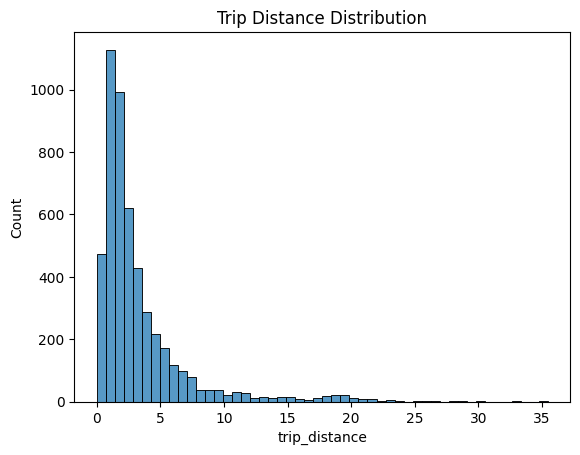

In [ ]:
sample = df.limit(5000).toPandas()
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=sample, x="trip_distance", bins=50)
plt.title("Trip Distance Distribution")
plt.show()
